# EJERCICIOS DE PROGRAMACIÓN USANDO DBSCAN

A continuación se plantean una serie de ejercicios. Por favor, responde a las preguntas que plantean. A parte de ello, no olvides adjuntar el código empleado para producir las respuestas a cada ejercicio.

### 1 (1 punto). Carga el archivo de datos “Odd_shape_data.xls” y representa sus observaciones gráficamente en un scatterplot que tenga por título “Data”, que su eje x tenga la etiqueta “V1” y su eje y la etiqueta “V2”.

## 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
data=pd.read_excel("Odd_shape_data.xls")

data.head()

,V1,V2
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699


In [3]:
data.shape

(201, 2)

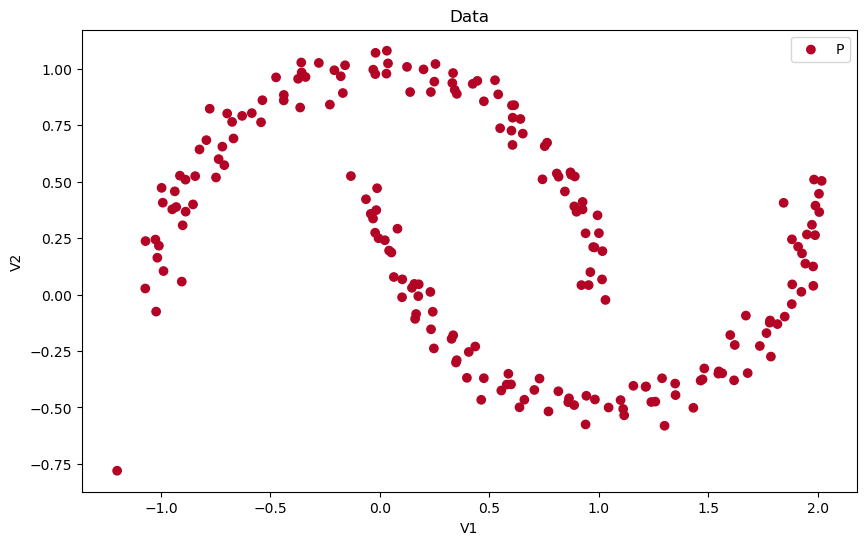

In [4]:
colores=list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', data["V1"]))

plt.figure(figsize=(10,6))

plt.scatter(data["V1"], data["V2"], c=colores,marker="o", picker=True)

plt.title("Data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend("Puntos de datos")

plt.show()

### 2 (4.5 puntos). Utiliza DBSCAN manipulando sus parámetros ϵ y n hasta encontrar unos valores con los que consigas un número de 2 clústers. Si para contabilizar el número de clústers utilizas la expresión “no_clusters = len(np.unique(labels) )”, ten en cuenta que ésta lo que hace es contabilizar el número total de etiquetas diferentes entre sí. Por tanto, si DBSCAN identifica 2 clústers, pero además existen casos atípicos, la anterior expresión tendrá un output de 3.  Especifica los valores de ϵ y n con los que has hallado 2 clústers y representa el mismo scatterplot del ejercicio de arriba, pero identificando las observaciones con diferentes colores según el clúster al que pertenezcan. Identifica también en este mismo scatterplot los casos atípicos

In [5]:
# Definimos los rangos de valores para los parámetros
epsilon_values = np.arange(0.15, 0.5, 0.05)  # Valores de epsilon de 0.05 a 0.5
min_samples_values = range(2, 10)  # Valores de min_samples de 2 a 9

resultados=[]

for epsilon in epsilon_values:
    for min_sample in min_samples_values:
        dbscan=DBSCAN(eps=epsilon,min_samples=min_sample).fit(data)
        labels=dbscan.labels_
        
        no_clusters = len(np.unique(labels))    #tiene en cuenta el cluster 3 de casos atipicos
        
        resultados.append((epsilon,min_sample,no_clusters))

#convertimos la salida del bucle en un dataframe

resultados_df=pd.DataFrame(resultados,columns=["epsilon","min_samples","num_clusters"])

#Filtramos pra encontrar las combinaciones que nos arrojen 3 clusters (que en realidad son 2 y el cluster de los casos atipicos)

dos_clusters=resultados_df[resultados_df["num_clusters"]==3]

print("Combinaciones que arrojan dos clusters:")
print(dos_clusters)

Combinaciones que arrojan dos clusters:
    epsilon  min_samples  num_clusters
0      0.15            2             3
1      0.15            3             3
2      0.15            4             3
3      0.15            5             3
4      0.15            6             3
5      0.15            7             3
8      0.20            2             3
9      0.20            3             3
10     0.20            4             3
11     0.20            5             3
12     0.20            6             3
13     0.20            7             3
14     0.20            8             3
15     0.20            9             3
16     0.25            2             3
17     0.25            3             3
18     0.25            4             3
19     0.25            5             3
20     0.25            6             3
21     0.25            7             3
22     0.25            8             3
23     0.25            9             3
24     0.30            2             3
25     0.30            3

In [6]:
best_params = dos_clusters.iloc[0]  # Cogemos la primera combinación que encontramos

best_params

epsilon         0.15
min_samples     2.00
num_clusters    3.00
Name: 0, dtype: float64

In [7]:
#realizamos el DBSCAN con la combinacion que nos arroja 2 clusters (sin contar con el cluster de los atipicos)

db_2=DBSCAN(eps=0.15,min_samples=2).fit(data)
labels_2=db_2.labels_

In [8]:
num_clusters=len(np.unique(labels_2[labels_2!=-1]))   #numero de clusters reales

print(f"Número de clusters {num_clusters}")


#recogemos los outliers en un objeto 

outliers=np.sum(np.array(labels_2) == -1, axis=0)

print(f"Número de outliers {outliers}")

Número de clusters 2
Número de outliers 1


C:\Users\alici\AppData\Local\Temp\ipykernel_17800\2770721916.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(noisy_points["V1"], noisy_points["V2"], c='red', marker='x', edgecolor='k', label='Noisy Points')


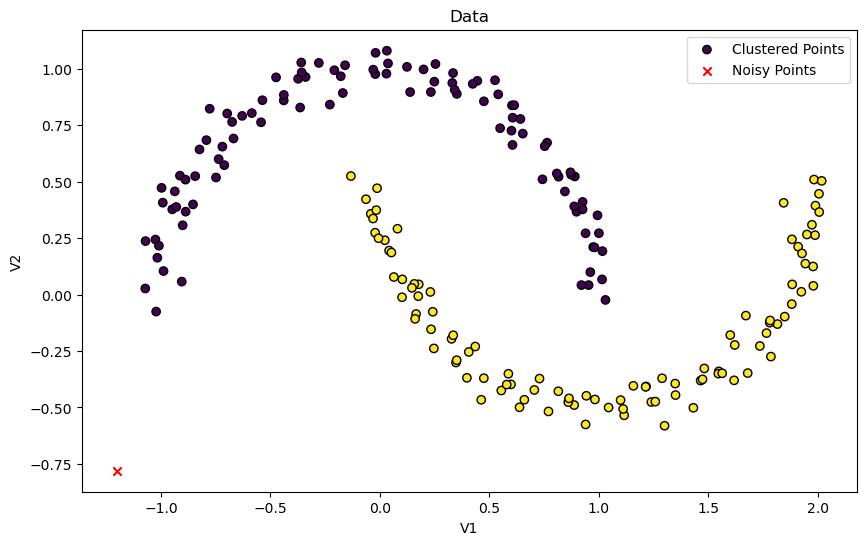

In [9]:
 
noisy_points=data[labels_2==-1]

clustered_points=data[labels_2!=-1]

plt.figure(figsize=(10, 6))

plt.scatter(clustered_points["V1"], clustered_points["V2"], c=labels_2[labels_2 != -1], cmap='viridis', marker='o', edgecolor='k', label='Clustered Points')

plt.scatter(noisy_points["V1"], noisy_points["V2"], c='red', marker='x', edgecolor='k', label='Noisy Points')

plt.title('Data')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()


### 3 (4.5 puntos). Vuelve a representar el scatterplot con las observaciones, esta vez eliminando los casos atípicos.

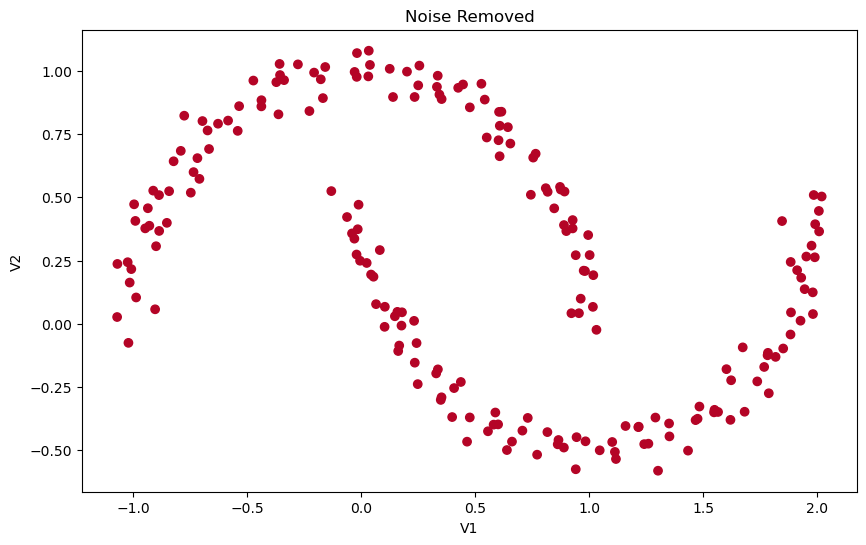

In [10]:
# Filtrar los puntos que no son ruido (labels_2 != -1)
no_noise_indices = np.where(labels_2 != -1)[0] 

# Extraer los datos y etiquetas sin ruido
X = data.iloc[no_noise_indices].to_numpy()  # Extraer las filas del DataFrame de 'data' que no son ruido
labels_rm = labels_2[no_noise_indices]  # Extraer las etiquetas correspondientes

colors = ['#b40426' if label != -1 else '#000000' for label in labels_rm]  

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, marker='o', picker=True)
plt.title('Noise Removed')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()
